Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection & Analysis

In [3]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('parkinsons.csv')

In [4]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 24)

In [6]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [9]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

1  --> Parkinson's Positive

0 --> Healthy


In [10]:
parkinsons_data['status'].unique()

array([1, 0], dtype=int64)

In [11]:
parkinsons_data.dtypes


name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [12]:
# grouping the data based on the target variable
numeric_columns = parkinsons_data.select_dtypes(include='float64').columns
numeric_columns_and_status = numeric_columns.append(pd.Index(['status']))
grouped_data = parkinsons_data[numeric_columns_and_status].groupby('status').mean()

# Display the result
print(grouped_data)


        MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                            
0        181.937771    223.636750    145.207292        0.003866   
1        145.180762    188.441463    106.893558        0.006989   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
status                                                                   
0               0.000023  0.001925  0.002056    0.005776      0.017615   
1               0.000051  0.003757  0.003900    0.011273      0.033658   

        MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA       NHR        HNR  \
status                    ...                                               
0               0.162958  ...  0.013305     0.028511  0.011483  24.678750   
1               0.321204  ...  0.027600     0.053027  0.029211  20.974048   

            RPDE       DFA   spread1   spread2        D2       PPE  
status                                                  

In [13]:
# grouping the data based on the target variable

# parkinsons_data.groupby('status').mean()

Data Pre-Processing

Separating the features & Target

In [14]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [15]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [16]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Splitting the data to training data & Test data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


Model Training

Support Vector Machine Model

In [19]:
model = svm.SVC(kernel='linear')

In [20]:
# training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [21]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [22]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8717948717948718


In [23]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [24]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8717948717948718


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
Y_train_pred = model.predict(X_train)
training_accuracy = accuracy_score(Y_train, Y_train_pred)
training_precision = precision_score(Y_train, Y_train_pred)
training_recall = recall_score(Y_train, Y_train_pred)
training_f1 = f1_score(Y_train, Y_train_pred)
training_roc_auc = roc_auc_score(Y_train, Y_train_pred)
training_confusion = confusion_matrix(Y_train, Y_train_pred)
print('Training Accuracy: ', training_accuracy)
print('Training Precision: ', training_precision)
print('Training Recall: ', training_recall)
print('Training F1 Score: ', training_f1)
print('Training ROC AUC Score: ', training_roc_auc)
print('Training Confusion Matrix: \n', training_confusion)

# Test data metrics
Y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
test_precision = precision_score(Y_test, Y_test_pred)
test_recall = recall_score(Y_test, Y_test_pred)
test_f1 = f1_score(Y_test, Y_test_pred)
test_roc_auc = roc_auc_score(Y_test, Y_test_pred)
test_confusion = confusion_matrix(Y_test, Y_test_pred)

print('Test Accuracy: ', test_accuracy)
print('Test Precision: ', test_precision)
print('Test Recall: ', test_recall)
print('Test F1 Score: ', test_f1)
print('Test ROC AUC Score: ', test_roc_auc)
print('Test Confusion Matrix: \n', test_confusion)

Training Accuracy:  0.8717948717948718
Training Precision:  0.8809523809523809
Training Recall:  0.9568965517241379
Training F1 Score:  0.9173553719008265
Training ROC AUC Score:  0.790948275862069
Training Confusion Matrix: 
 [[ 25  15]
 [  5 111]]
Test Accuracy:  0.8717948717948718
Test Precision:  0.8823529411764706
Test Recall:  0.967741935483871
Test F1 Score:  0.9230769230769231
Test ROC AUC Score:  0.7338709677419355
Test Confusion Matrix: 
 [[ 4  4]
 [ 1 30]]


In [26]:
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, Y_train)

# Training data
Y_train_pred_logistic = logistic_classifier.predict(X_train)
training_accuracy_logistic = accuracy_score(Y_train_pred_logistic, Y_train)
training_precision_logistic = precision_score(Y_train, Y_train_pred_logistic)
training_recall_logistic = recall_score(Y_train, Y_train_pred_logistic)
training_f1_logistic = f1_score(Y_train, Y_train_pred_logistic)
training_roc_auc_logistic = roc_auc_score(Y_train, Y_train_pred_logistic)
training_confusion_matrix_logistic = confusion_matrix(Y_train, Y_train_pred_logistic)

print('Training Accuracy (Logistic Regression): ', training_accuracy_logistic)
print('Training Precision (Logistic Regression): ', training_precision_logistic)
print('Training Recall (Logistic Regression): ', training_recall_logistic)
print('Training F1 Score (Logistic Regression): ', training_f1_logistic)
print('Training ROC AUC Score (Logistic Regression): ', training_roc_auc_logistic)
print('Training Confusion Matrix (Logistic Regression): \n', training_confusion_matrix_logistic)
Y_test_pred_logistic = logistic_classifier.predict(X_test)
test_accuracy_logistic = accuracy_score(Y_test_pred_logistic, Y_test)
test_precision_logistic = precision_score(Y_test, Y_test_pred_logistic)
test_recall_logistic = recall_score(Y_test, Y_test_pred_logistic)
test_f1_logistic = f1_score(Y_test, Y_test_pred_logistic)
test_roc_auc_logistic = roc_auc_score(Y_test, Y_test_pred_logistic)
test_confusion_matrix_logistic = confusion_matrix(Y_test, Y_test_pred_logistic)

print('Test Accuracy (Logistic Regression): ', test_accuracy_logistic)
print('Test Precision (Logistic Regression): ', test_precision_logistic)
print('Test Recall (Logistic Regression): ', test_recall_logistic)
print('Test F1 Score (Logistic Regression): ', test_f1_logistic)
print('Test ROC AUC Score (Logistic Regression): ', test_roc_auc_logistic)
print('Test Confusion Matrix (Logistic Regression): \n', test_confusion_matrix_logistic)

Training Accuracy (Logistic Regression):  0.8782051282051282
Training Precision (Logistic Regression):  0.8943089430894309
Training Recall (Logistic Regression):  0.9482758620689655
Training F1 Score (Logistic Regression):  0.9205020920502092
Training ROC AUC Score (Logistic Regression):  0.8116379310344828
Training Confusion Matrix (Logistic Regression): 
 [[ 27  13]
 [  6 110]]
Test Accuracy (Logistic Regression):  0.8717948717948718
Test Precision (Logistic Regression):  0.8823529411764706
Test Recall (Logistic Regression):  0.967741935483871
Test F1 Score (Logistic Regression):  0.9230769230769231
Test ROC AUC Score (Logistic Regression):  0.7338709677419355
Test Confusion Matrix (Logistic Regression): 
 [[ 4  4]
 [ 1 30]]


c:\Users\Sahil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, Y_train)

# Training data
Y_train_pred_rf = random_forest_classifier.predict(X_train)
training_accuracy_rf = accuracy_score(Y_train_pred_rf, Y_train)
training_precision_rf = precision_score(Y_train, Y_train_pred_rf)
training_recall_rf = recall_score(Y_train, Y_train_pred_rf)
training_f1_rf = f1_score(Y_train, Y_train_pred_rf)
training_roc_auc_rf = roc_auc_score(Y_train, Y_train_pred_rf)
training_confusion_matrix_rf = confusion_matrix(Y_train, Y_train_pred_rf)

print('Training Accuracy (Random Forest): ', training_accuracy_rf)
print('Training Precision (Random Forest): ', training_precision_rf)
print('Training Recall (Random Forest): ', training_recall_rf)
print('Training F1 Score (Random Forest): ', training_f1_rf)
print('Training ROC AUC Score (Random Forest): ', training_roc_auc_rf)
print('Training Confusion Matrix (Random Forest): \n', training_confusion_matrix_rf)

# Test data
Y_test_pred_rf = random_forest_classifier.predict(X_test)
test_accuracy_rf = accuracy_score(Y_test_pred_rf, Y_test)
test_precision_rf = precision_score(Y_test, Y_test_pred_rf)
test_recall_rf = recall_score(Y_test, Y_test_pred_rf)
test_f1_rf = f1_score(Y_test, Y_test_pred_rf)
test_roc_auc_rf = roc_auc_score(Y_test, Y_test_pred_rf)
test_confusion_matrix_rf = confusion_matrix(Y_test, Y_test_pred_rf)

print('Test Accuracy (Random Forest): ', test_accuracy_rf)
print('Test Precision (Random Forest): ', test_precision_rf)
print('Test Recall (Random Forest): ', test_recall_rf)
print('Test F1 Score (Random Forest): ', test_f1_rf)
print('Test ROC AUC Score (Random Forest): ', test_roc_auc_rf)
print('Test Confusion Matrix (Random Forest): \n', test_confusion_matrix_rf)

Training Accuracy (Random Forest):  1.0
Training Precision (Random Forest):  1.0
Training Recall (Random Forest):  1.0
Training F1 Score (Random Forest):  1.0
Training ROC AUC Score (Random Forest):  1.0
Training Confusion Matrix (Random Forest): 
 [[ 40   0]
 [  0 116]]
Test Accuracy (Random Forest):  0.8461538461538461
Test Precision (Random Forest):  0.9032258064516129
Test Recall (Random Forest):  0.9032258064516129
Test F1 Score (Random Forest):  0.9032258064516129
Test ROC AUC Score (Random Forest):  0.7641129032258064
Test Confusion Matrix (Random Forest): 
 [[ 5  3]
 [ 3 28]]


In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score

# Define the CNN architecture
model_cnn = models.Sequential([
    layers.Input(shape=(22,)),
    layers.Reshape((22, 1, 1)),
    layers.Conv2D(32, (3, 1), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


# Compile the model
model_cnn.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model_cnn.fit(X_train, Y_train, epochs=1000, batch_size=16)



# Evaluate the model on training data
Y_train_prediction = model_cnn.predict(X_train)
training_data_accuracy = accuracy_score(tf.argmax(Y_train_prediction, axis=1), Y_train)
print("Training data accuracy:", training_data_accuracy)
# test_data_accuracy = accuracy_score(tf.argmax(Y_train_prediction, axis=1), Y_test)
training_data_precision = precision_score(Y_train, tf.argmax(Y_train_prediction, axis=1), average='weighted')
training_data_recall = recall_score(Y_train, tf.argmax(Y_train_prediction, axis=1), average='weighted')
training_data_f1 = f1_score(Y_train, tf.argmax(Y_train_prediction, axis=1), average='weighted')
training_data_confusion = confusion_matrix(Y_train, tf.argmax(Y_train_prediction, axis=1))

print("Test Data Accuracy:", training_data_accuracy)
print("Test Data Precision:", training_data_precision)
print("Test Data Recall:", training_data_recall)
print("Test Data F1 Score:", training_data_f1)
print("Test Data Confusion Matrix:\n", training_data_confusion )

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2397 - loss: 9.7870       
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5266 - loss: 1.5433 
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6611 - loss: 0.7652 
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7053 - loss: 0.8622 
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6955 - loss: 0.6696 
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6830 - loss: 0.6308 
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5786 - loss: 0.6816 
Epoch 8/1000


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7585 - loss: 0.6760 
Epoch 9/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7583 - loss: 0.5594
Epoch 10/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7859 - loss: 0.5032 
Epoch 11/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7337 - loss: 0.5403 
Epoch 12/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7443 - loss: 0.5245 
Epoch 13/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8527 - loss: 0.4304 
Epoch 14/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7361 - loss: 0.5242 
Epoch 15/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8305 - loss: 0.4345 
Epoch 16/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8271 - loss: 0.4313
Epoch 17/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7898 - loss: 0.4496  
Epoch 18/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7944 - loss: 0.4675 
Epoch 19/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10m

C:\Users\Sahil\AppData\Local\Temp\ipykernel_9700\2715557659.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithms, rotation=45)
C:\Users\Sahil\AppData\Local\Temp\ipykernel_9700\2715557659.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithms, rotation=45)
C:\Users\Sahil\AppData\Local\Temp\ipykernel_9700\2715557659.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithms, rotation=45)
C:\Users\Sahil\AppData\Local\Temp\ipykernel_9700\2715557659.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithms, rotation=45)


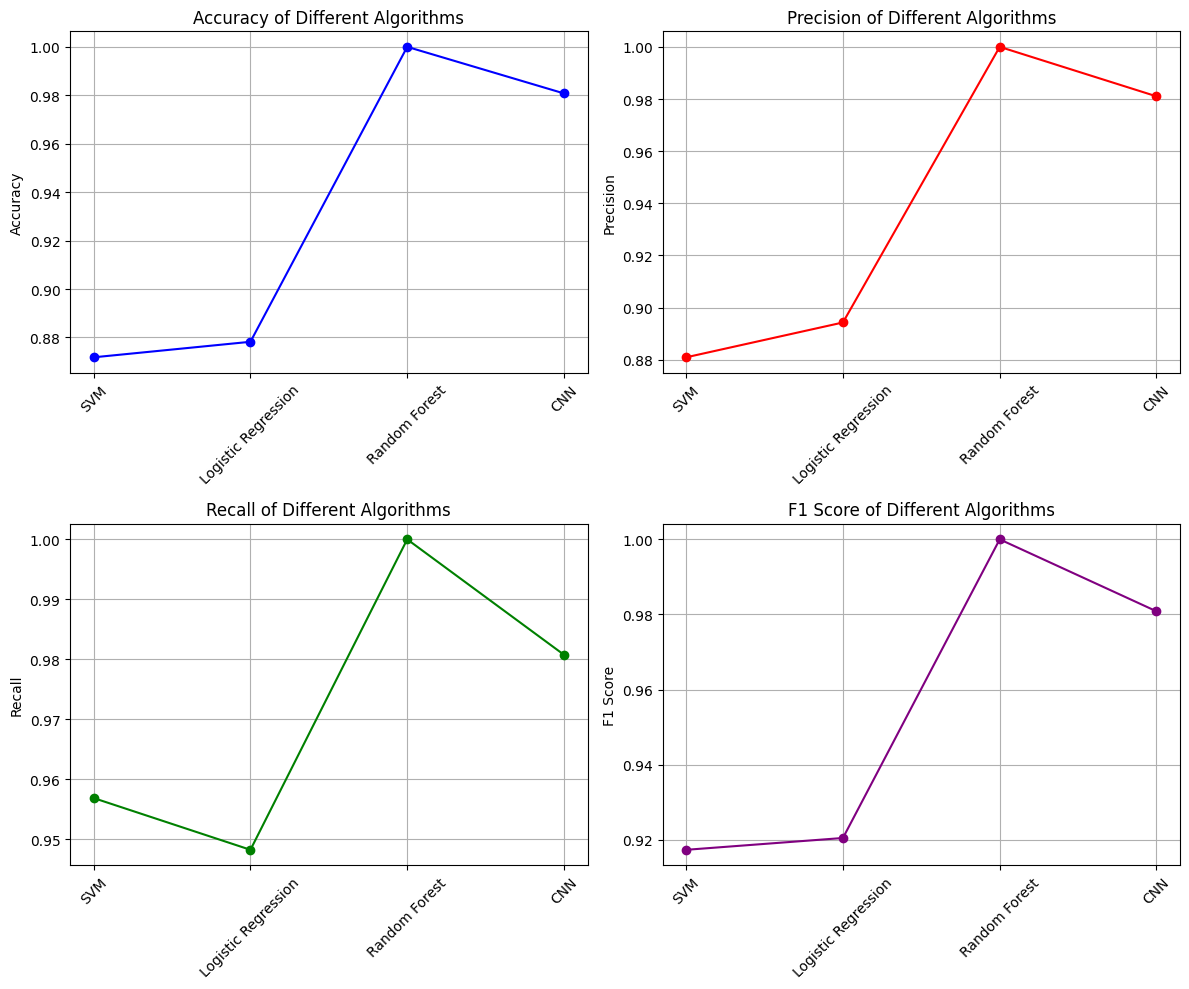

In [29]:
import matplotlib.pyplot as plt

# Performance metrics values for each algorithm
accuracy_values = [training_accuracy, training_accuracy_logistic, training_accuracy_rf, training_data_accuracy]
precision_values = [training_precision, training_precision_logistic, training_precision_rf, training_data_precision]
recall_values = [training_recall, training_recall_logistic, training_recall_rf, training_data_recall]
f1_values = [training_f1, training_f1_logistic, training_f1_rf, training_data_f1]

# Algorithm names
algorithms = ['SVM', 'Logistic Regression', 'Random Forest', 'CNN']

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Accuracy plot
axs[0, 0].plot(algorithms, accuracy_values, marker='o', linestyle='-', color='b')
axs[0, 0].set_title('Accuracy of Different Algorithms')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].grid(True)

# Precision plot
axs[0, 1].plot(algorithms, precision_values, marker='o', linestyle='-', color='r')
axs[0, 1].set_title('Precision of Different Algorithms')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].grid(True)

# Recall plot
axs[1, 0].plot(algorithms, recall_values, marker='o', linestyle='-', color='g')
axs[1, 0].set_title('Recall of Different Algorithms')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].grid(True)

# F1 Score plot
axs[1, 1].plot(algorithms, f1_values, marker='o', linestyle='-', color='purple')
axs[1, 1].set_title('F1 Score of Different Algorithms')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].grid(True)

# Rotate x-axis labels
for ax in axs.flat:
    ax.set_xticklabels(algorithms, rotation=45)

plt.tight_layout()
plt.show()


In [30]:
# import tensorflow as tf
# from tensorflow.keras import layers, models
# from sklearn.metrics import accuracy_score

# # Define the CNN architecture
# model_cnn = models.Sequential([
#     layers.Input(shape=(8,)),
#     layers.Reshape((8, 1, 1)),
#     layers.Conv2D(32, (3, 1), activation='relu'),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(10, activation='softmax')
# ])


# # Compile the model
# model_cnn.compile(optimizer='adam',
#                loss='sparse_categorical_crossentropy',
#                metrics=['accuracy'])

# model_cnn.fit(X_train, Y_train, epochs=1000, batch_size=16)



# # Evaluate the model on training data
# Y_train_prediction = model_cnn.predict(X_train)
# training_data_accuracy = accuracy_score(tf.argmax(Y_train_prediction, axis=1), Y_train)
# print("Training data accuracy:", training_data_accuracy)

Building a Predictive System

In [31]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)


if prediction[0] == 0:
    print("\033[1mThe Person does not have Parkinson's Disease\033[0m")
    
else:
    print("\033[1mThe Person has Parkinson's\033[0m")

[0]
The Person does not have Parkinson's Disease


c:\Users\Sahil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Saving the trained model

In [32]:
import pickle

In [33]:
filename = 'parkinsons_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [34]:
# loading the saved model
loaded_model = pickle.load(open('parkinsons_model.sav', 'rb'))

In [35]:
for column in X.columns:
  print(column)

MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
RPDE
DFA
spread1
spread2
D2
PPE
